In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

In [127]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
raca_2022 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

In [128]:
# Leitura da tabela de dados separados por setores da TI:
RAIS_GERAL_2022 = pd.read_csv("C:/Users/victo/2022/estagio/estagio/data/raw/DATA_RAIS_GERAL_2022.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2022.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [129]:
RAIS_GERAL_2022 = RAIS_GERAL_2022[RAIS_GERAL_2022["Raça"] != 9]
RAIS_GERAL_2022 = RAIS_GERAL_2022[RAIS_GERAL_2022["Raça"] != 99]

In [130]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2022
fator_correcao_inflacao_2022 = 1.06951750

RAIS_GERAL_2022["Remuneração"] = RAIS_GERAL_2022["Remuneração"] * fator_correcao_inflacao_2022

In [131]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2022.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,42,8,"2,363.73",1
1,MS,212420,47113,1,30,2,"3,385.09",1
2,MS,212415,47440,3,38,8,"5,347.59",1
3,MS,212315,38114,4,57,8,"6,135.89",1
4,MS,212315,38114,4,40,8,"3,831.76",1


In [132]:
# Tabela principal para quantidade:
RAIS_GERAL_2022_QNT = pd.crosstab(RAIS_GERAL_2022["Raça"].replace(raca_2022), RAIS_GERAL_2022["Sexo"].replace(sexo))
RAIS_GERAL_2022_QNT.insert(1, "% Fem.", RAIS_GERAL_2022_QNT["Fem."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)
RAIS_GERAL_2022_QNT.insert(3, "% Masc.", RAIS_GERAL_2022_QNT["Masc."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)

RAIS_GERAL_2022_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,3205,27.64,8391,72.36
Branca,87702,21.33,323395,78.67
Indigena,301,22.35,1046,77.65
Parda,32471,19.60,133224,80.40
Preta,7305,21.85,26123,78.15


In [133]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2022_QNT["Total"] = RAIS_GERAL_2022_QNT["% Masc."] + RAIS_GERAL_2022_QNT["% Fem."]
RAIS_GERAL_2022_QNT["Ano"] = "2022"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2022_QNT]).reset_index()

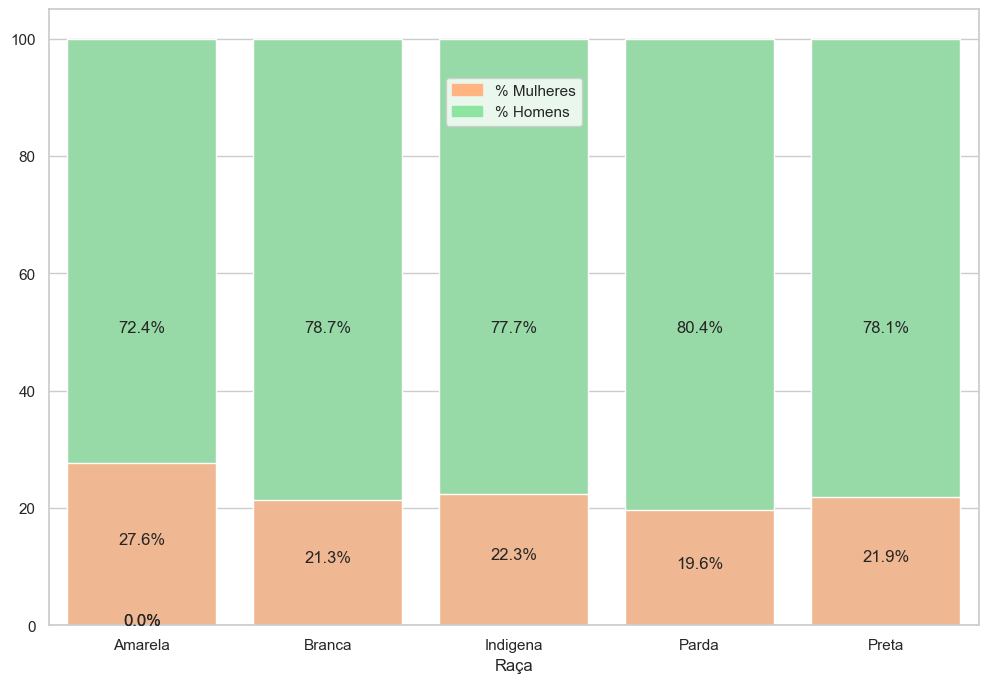

In [134]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Raça", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for value, patch in zip(RAIS_GERAL_QNT_GRAF["% Masc."], patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    bar1.annotate('{:.1f}%'.format(value), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="Raça", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/qnt_sexo_raca.svg")

In [135]:
# Criação da tabela para o boxplot 
RAIS_GERAL_2022_BOX = RAIS_GERAL_2022
RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2022_BOX["Raça"].replace(raca_2022, inplace = True)

RAIS_GERAL_2022_BOX

C:\Users\victo\AppData\Local\Temp\ipykernel_30480\1363727770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)
C:\Users\victo\AppData\Local\Temp\ipykernel_30480\1363727770.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,42,Parda,"2,363.73",Masc.
1,MS,212420,47113,1,30,Branca,"3,385.09",Masc.
2,MS,212415,47440,3,38,Parda,"5,347.59",Masc.
3,MS,212315,38114,4,57,Parda,"6,135.89",Masc.
4,MS,212315,38114,4,40,Parda,"3,831.76",Masc.
...,...,...,...,...,...,...,...,...
789919,RS,212420,62040,11,40,Branca,"14,726.24",Fem.
789920,RS,212405,72100,11,39,Branca,"17,325.30",Fem.
789921,RS,212215,62015,11,38,Branca,"12,440.77",Fem.
789922,RS,212405,74901,11,35,Branca,"5,240.64",Fem.


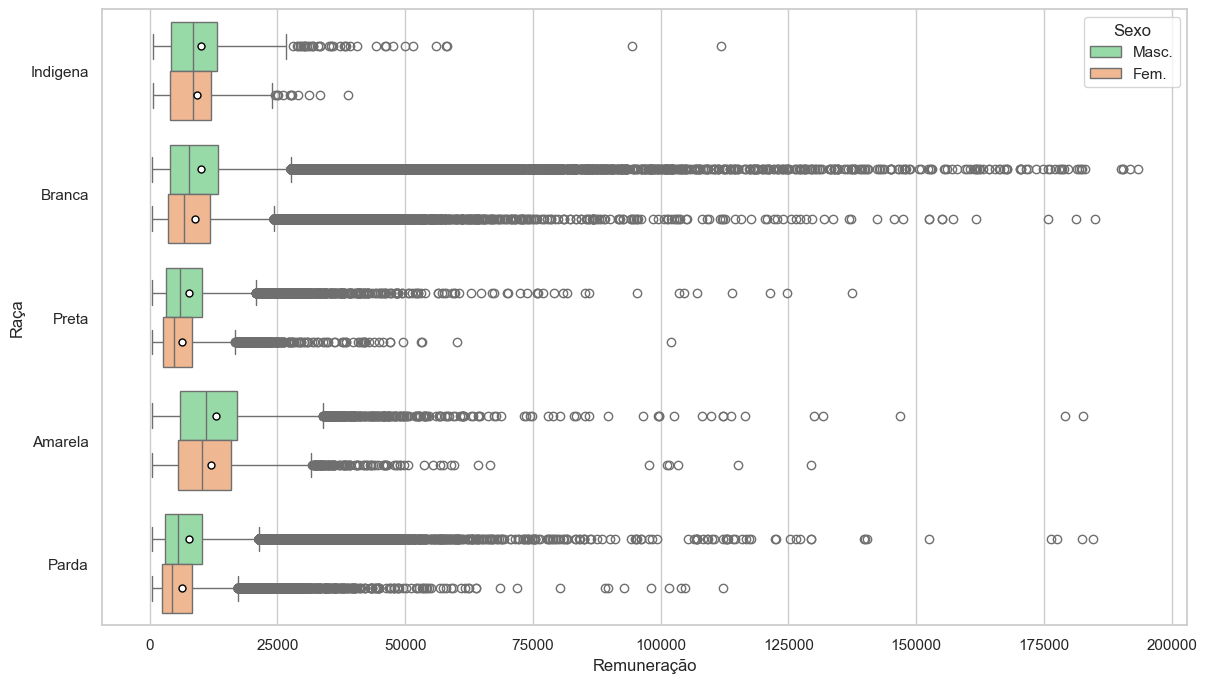

In [136]:
# Criação do boxplot:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2022_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2022.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/boxplot_sexo_raca_2022.png", dpi = 300)

In [137]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2022_MEDIA = pd.crosstab(RAIS_GERAL_2022["Raça"].replace(raca_2022), RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2022_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIA["Fem."] - RAIS_GERAL_2022_MEDIA["Masc."]) / RAIS_GERAL_2022_MEDIA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"12,025.96","13,029.63",-7.70
Branca,"8,973.74","10,151.28",-11.60
Indigena,"9,234.97","10,118.12",-8.73
Parda,"6,329.99","7,637.18",-17.12
Preta,"6,363.10","7,693.72",-17.29


In [138]:
RAIS_GERAL_2022_MEDIA["Ano"] = "2022"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIA]).reset_index()

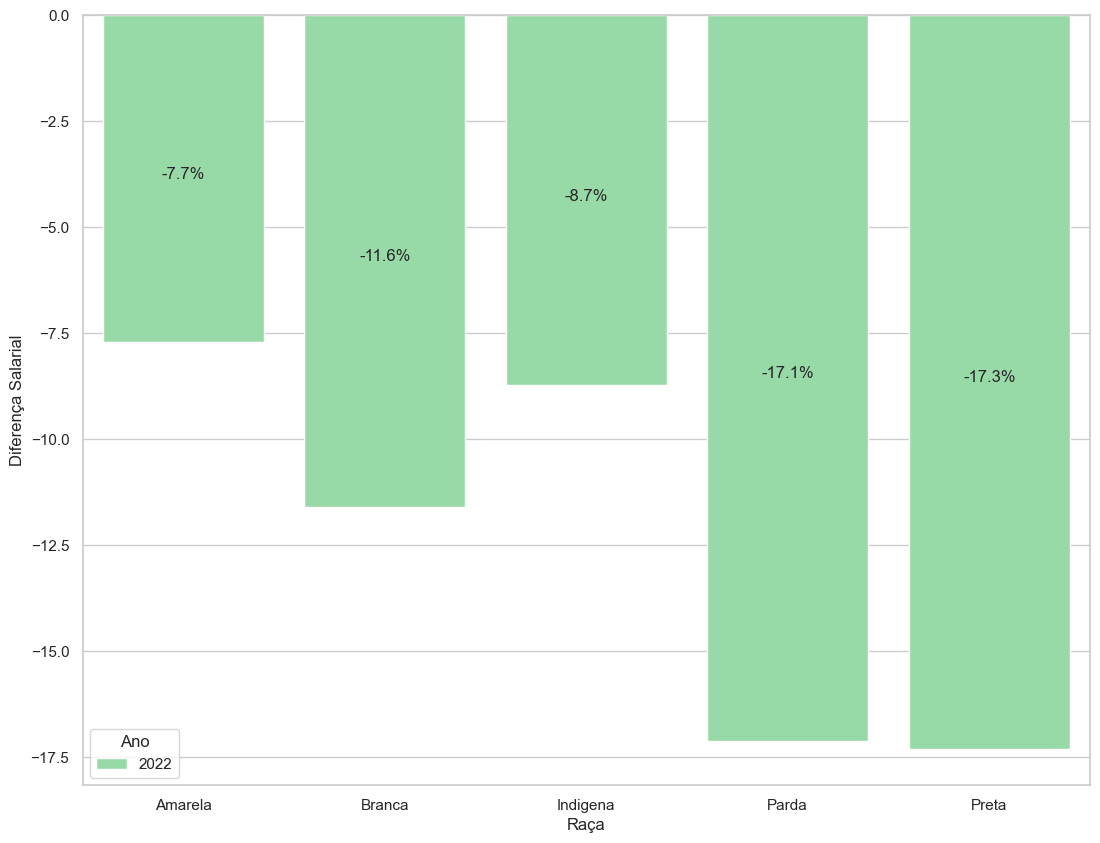

In [139]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2022": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for value, patch in zip(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"], patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    bar.annotate('{:.1f}%'.format(value), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/dif_salarial_sexo_raca_media.svg")

In [140]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2022_MEDIANA = pd.crosstab(RAIS_GERAL_2022["Raça"].replace(raca_2022), RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'median')
RAIS_GERAL_2022_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIANA["Fem."] - RAIS_GERAL_2022_MEDIANA["Masc."]) / RAIS_GERAL_2022_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"10,160.42","10,963.91",-7.33
Branca,"6,647.37","7,689.34",-13.55
Indigena,"8,556.14","8,454.76",1.20
Parda,"4,459.57","5,490.12",-18.77
Preta,"4,812.83","5,882.35",-18.18


In [141]:
RAIS_GERAL_2022_MEDIANA["Ano"] = "2022"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIANA]).reset_index()

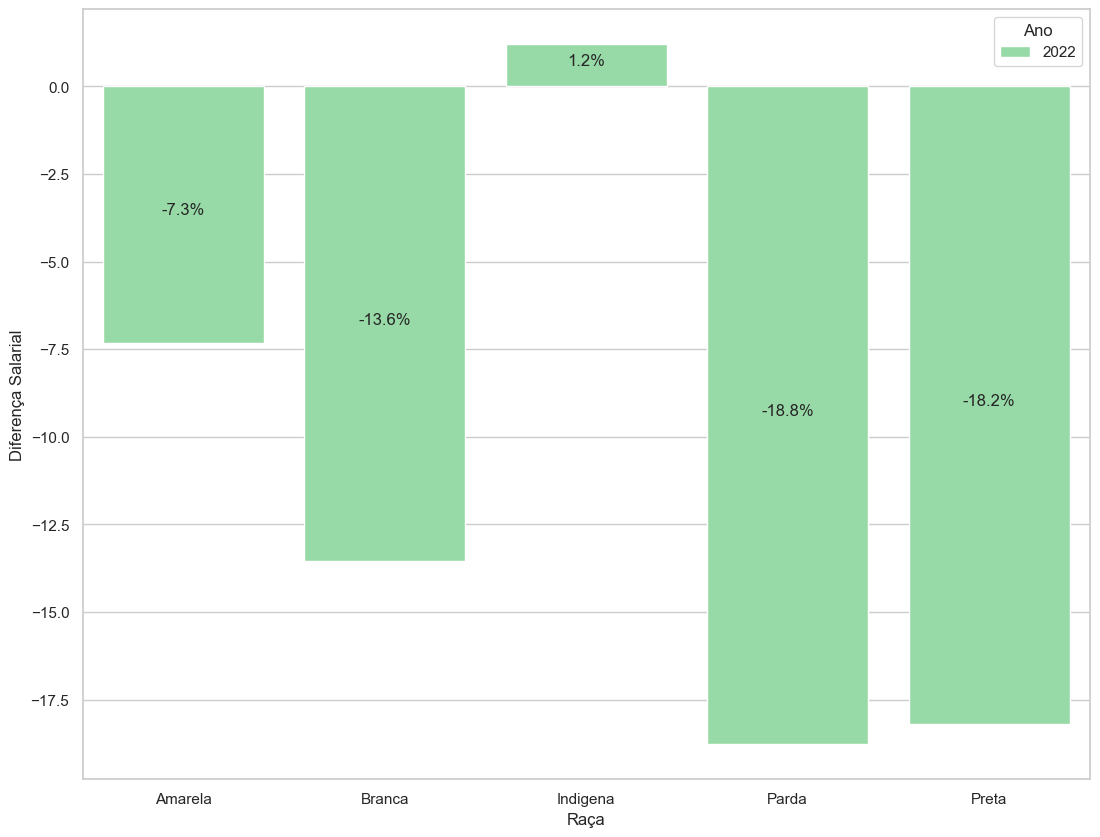

In [142]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2022": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for value, patch in zip(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"], patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    bar.annotate('{:.1f}%'.format(value), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/dif_salarial_sexo_raca_mediana.svg")

In [143]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [144]:
TESTE_HIP_2022 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2022:
    df1 = RAIS_GERAL_2022.query("Sexo == 'Masc.'").replace(raca_2022).query("Raça == '{}'".format(raca_2022[raca])).Remuneração
    df2 = RAIS_GERAL_2022.query("Sexo == 'Fem.'").replace(raca_2022).query("Raça == '{}'".format(raca_2022[raca])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2022.loc[raca_2022[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2022_HIP = pd.merge(RAIS_GERAL_2022_MEDIA, TESTE_HIP_2022, left_index=True, right_index=True)
RAIS_GERAL_2022_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2022_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Amarela,"12,025.96","13,029.63",12645195.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Branca,"8,973.74","10,151.28",12961288158.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Indigena,"9,234.97","10,118.12",162835.5,0.01 > 0.81864...,Medianas estatisticamente iguais
Parda,"6,329.99","7,637.18",1873242092.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Preta,"6,363.10","7,693.72",82531754.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
